In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
X = np.linspace(-10, 10, 300).reshape(-1, 1)

In [9]:
y = np.sinc(X[:,0])
sigma = 0.015
yn = y + sigma * np.random.normal(size=y.shape)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, yn, test_size=0.2)

In [10]:
kernel = 1.0 * RBF()
model = GaussianProcessRegressor(kernel=kernel, alpha=sigma**2)

In [11]:
model.fit(X_train, y_train)

GaussianProcessRegressor(alpha=0.000225, kernel=1**2 * RBF(length_scale=1))

In [12]:
model.score(X_test, y_test)

0.9931908132680423

In [13]:
y_pred, y_std = model.predict(X, return_std=True)

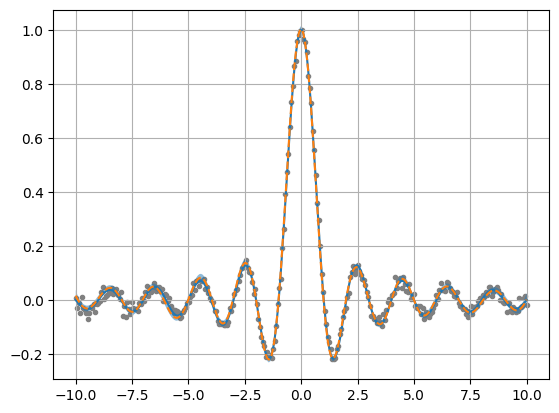

In [20]:
fig, axe = plt.subplots()
axe.plot(X, y)
axe.scatter(X, yn, marker=".", color="gray")
axe.plot(X, y_pred, linestyle="--")
axe.fill_between(X.ravel(), y_pred - 1.96 * y_std, y_pred + 1.96 * y_std, alpha=0.5)
axe.grid()